# ISLR-Python Ch5 Applied 9

- [Load Boston Dataset](#Load-Boston-Dataset)
- [A. Estimate Mean Medv: mu](#A.-Estimate-Mean-Medv:-mu)
- [B. Estimate SE of mu](#B.-Estimate-SE-of-mu)
- [C. Bootsrap Estimate of SE of mu](#C.-Bootstrap-Estimate-of-SE-of-mu)
- [D. Construct 95% CI for mu](#D.-Construct-95%-CI-for-mu)
- [E. Compute Median of Medv: mu_med](#E.-Compute-Median-of-Medv:-mu_med)
- [F. Estimate SE of mu_med](#F.-Estimate-SE-of-mu_med)
- [G. Estimate Tenth Percentile of Medv](#G.-Estimate-Tenth-Percentile-of-Medv)
- [H. Estimate SE of mu_0.1](#H.-Estimate-SE-of-mu_0.1)

In [112]:
# Imports
import numpy as np 
import pandas as pd

from matplotlib import pyplot as plt
from scipy import stats as stats
from functools import partial

# print numpy arrays with precision 4
np.set_printoptions(precision=4)

In [113]:
boston= pd.read_csv('../../../data/Boston.csv', index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## A. Estimate Mean Medv: mu

In [114]:
# Get mean of medv column
mu = boston.medv.mean(axis=0)
print('mu = ',mu)

mu =  22.5328063241


## B. Estimate SE of mu

We estimate the SE of a statistic by $\frac{SD}{\sqrt{n}}$

In [115]:
SE = boston.medv.std(axis=0)/np.sqrt(len(boston))
print('SE(mu) = ', SE)

SE(mu) =  0.408861147498


## C. Bootstrap Estimate of SE of mu

In [116]:
# Create Boot Func #
####################
def boot(df, column, statistic, num_samples=10000):
    """
    Returns a bootstrapped estimate of the SE of the statistic applied to column in dataframe.
    """
    
    def bootstrap_sample(df, column, statistic):
        """
        Compute bootstrap sample of column in dataframe df applying statistic function.
        """
        # get a random sampling of indices
        boot_indices = np.random.choice(df.index, size=len(df), replace=True)
        # compute a sample statistic
        sample_stat = statistic(df[column].loc[boot_indices])
    
        return sample_stat
    
    return scipy.std([bootstrap_sample(df, column, statistic) for sample in range(num_samples)],axis=0)

print(boot(boston,'medv', np.mean))

0.408671617577


This value is within 1/1000th of the computed SE in B.

## D. Construct 95% CI for mu

A confidence interval for the t-distribution is $\left[\mu - t_{\alpha/2,n-1}SE, \quad \mu + t_{\alpha/2,n-1}SE\right]$. The text approximates $t_{a/2,n-1}$ as 2. Lets get the exact value here.

In [117]:
# compute t_alpha/2,n-1, This is the inverse 1-CDF function called survival function in scipy
t_alpha = stats.t.isf(.05/2,len(boston)-1)
print('t_alpha/2,n-1 =', t_alpha )

t_alpha/2,n-1 = 1.96467263874


So the text's approximation of 2 value is 2% off the true value t_alpha/2,n-1... pretty close

In [118]:
# print out the confidence interval
print('CI =' ,np.array([mu-t_alpha*SE, mu+t_alpha*SE]))

CI = [ 21.7295  23.3361]


## E. Compute Median of Medv: mu_med

In [119]:
median = boston.medv.median(axis=0)
print(median)

21.2


## F. Estimate SE of mu_med

In [120]:
# The boot function written above can take any stat function so use it here
se_mu_med = boot(boston, 'medv', np.median)
print('Standard Error of Median =', se_mu_med)

Standard Error of Median = 0.37450551064


The standard error of the median is slightly smaller than the standard error of the mean. This makes sense when we look at a histogram of medv.

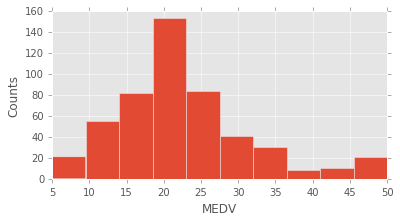

In [121]:
fig, ax1 = plt.subplots(figsize=(6,3))
boston.hist('medv',ax = ax1);
ax1.set_xlabel('MEDV');
ax1.set_ylabel('Counts');
plt.title('');

The data has a ~20 large MEDVs (> 45). The mean will be pulled by these large values but the median is less swayed by these large values because it only looks at the number of points above and below the 50% of total data. For example the values 35 and 50 are treated the same i.e. they both lie in the upper 50%.

## G. Estimate Tenth Percentile of Medv

In [122]:
mu_0p1 = boston.medv.quantile(q=0.1)
print(mu_0p1)

12.75


## H. Estimate SE of mu_0.1

In [123]:
# The boot function written in C can take any stat function so use it here
# create a 10th percentile stats function using np.percentile
f = partial(np.percentile, q=10)
# call our boot function from c
se_mu_med = boot(boston, 'medv',f)
print('Standard Error of Median =', se_mu_med)

Standard Error of Median = 0.497726174091


The mu of the tenth percentile is more variable than mu_med. There are many fewer values in this small segement of the population.